In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Tiền xử lý dữ liệu
data_path = 'heart_statlog_cleveland_hungary_final.csv'  # Thay đổi thành đường dẫn thực tế của file dữ liệu
data = pd.read_csv(data_path)
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [2]:
data.aggregate(['min', 'mean', 'max'])

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.00000,0.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.62437,0.528571
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.00000,1.000000


In [3]:
data.shape

(1190, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
data.describe ()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [7]:
data.sex.value_counts()

1    909
0    281
Name: sex, dtype: int64

******************************
Sex (Gender) Total
******************************


1    909
0    281
Name: sex, dtype: int64

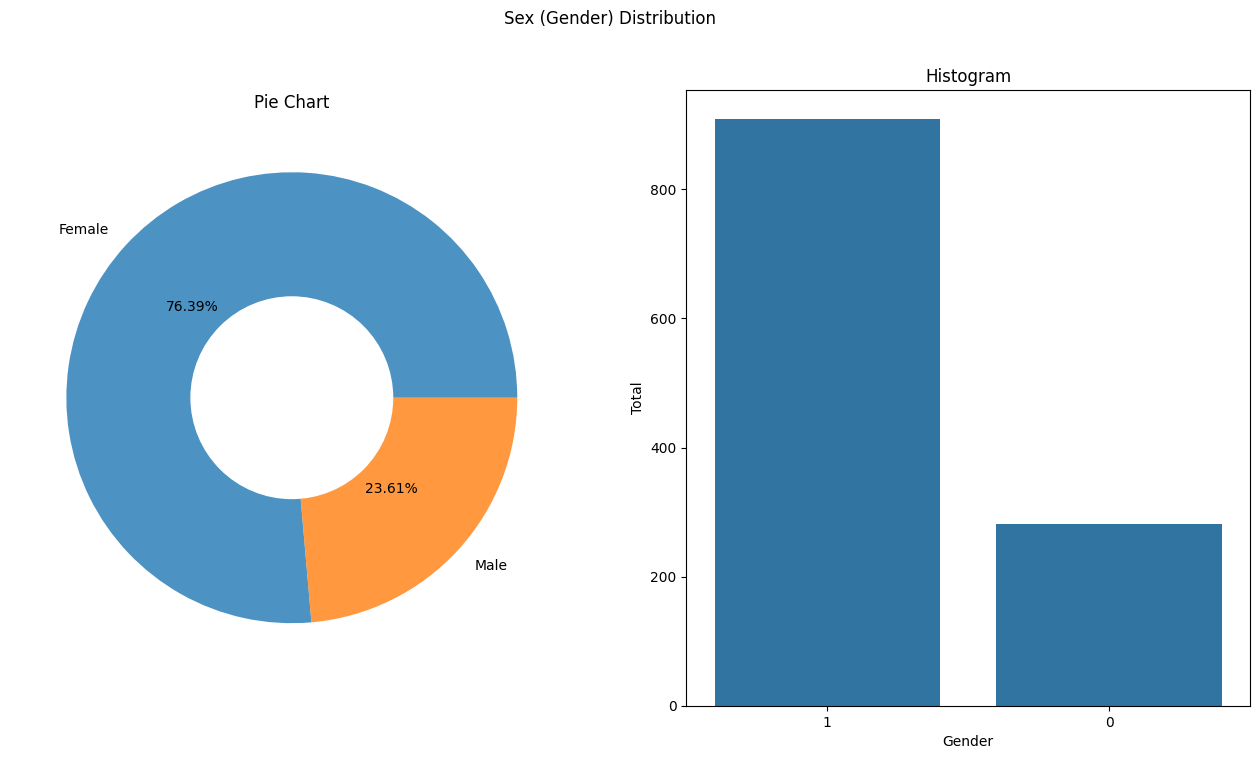

In [8]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

labels=['Female', 'Male']
order=data['sex'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Sex (Gender) Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(data['sex'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='sex',data=data,order=order)
plt.xlabel('Gender')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('*' * 30)
print('Sex (Gender) Total')
print('*' * 30)
data.sex.value_counts(dropna=False)
# print()

In [9]:
X = data.drop('target', axis=1)
y = data['target']

In [10]:
# Chia tập dữ liệu thành huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create the model
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(11,)))
model.add(keras.layers.Dense(256, kernel_initializer=tf.keras.initializers.HeNormal(seed=None), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(seed=None), activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(64, kernel_initializer=tf.keras.initializers.HeNormal(seed=None), activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1, activation='sigmoid'))


In [13]:
# Compile mô hình
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [15]:
# Huấn luyện mô hình
a = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=120, batch_size=32, callbacks=[checkpoint, early_stopping], verbose=2)


Epoch 1/120

Epoch 1: val_accuracy improved from -inf to 0.75916, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 - 6s - loss: 0.5897 - accuracy: 0.7359 - val_loss: 0.5563 - val_accuracy: 0.7592 - 6s/epoch - 251ms/step
Epoch 2/120

Epoch 2: val_accuracy improved from 0.75916 to 0.78534, saving model to best_model.h5
24/24 - 1s - loss: 0.4363 - accuracy: 0.8318 - val_loss: 0.5122 - val_accuracy: 0.7853 - 700ms/epoch - 29ms/step
Epoch 3/120

Epoch 3: val_accuracy improved from 0.78534 to 0.81152, saving model to best_model.h5
24/24 - 1s - loss: 0.4152 - accuracy: 0.8279 - val_loss: 0.4903 - val_accuracy: 0.8115 - 596ms/epoch - 25ms/step
Epoch 4/120

Epoch 4: val_accuracy did not improve from 0.81152
24/24 - 0s - loss: 0.3802 - accuracy: 0.8265 - val_loss: 0.4550 - val_accuracy: 0.8115 - 414ms/epoch - 17ms/step
Epoch 5/120

Epoch 5: val_accuracy did not improve from 0.81152
24/24 - 0s - loss: 0.3498 - accuracy: 0.8568 - val_loss: 0.4390 - val_accuracy: 0.7958 - 263ms/epoch - 11ms/step
Epoch 6/120

Epoch 6: val_accuracy improved from 0.81152 to 0.82723, saving model to best_model.h5
24/24 - 0s -

In [16]:
# Đánh giá mô hình
final_loss, final_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Độ chính xác cuối cùng trên tập kiểm tra: {final_accuracy:.4f}")
print(f"Mất mát cuối cùng trên tập kiểm tra: {final_loss:.4f}")

8/8 [==============================] - 0s 4ms/step - loss: 0.3120 - accuracy: 0.8950
Độ chính xác cuối cùng trên tập kiểm tra: 0.8950
Mất mát cuối cùng trên tập kiểm tra: 0.3120


In [17]:
# Dự đoán trên tập kiểm tra
y_predicted = model.predict(X_test_scaled)
y_predicted = (y_predicted > 0.5).astype(int)

# Tạo DataFrame để hiển thị kết quả
results_df = pd.DataFrame({
    'Real Values': y_test.values.flatten(),  # Đảm bảo y_test là một Series hoặc tương tự
    'Predicted Values': y_predicted.flatten()
})

# Thêm cột 'Check'
results_df['Check'] = results_df['Real Values'] == results_df['Predicted Values']

# Sử dụng to_string() để in DataFrame mà không hiển thị index
print(results_df.head(15).to_string(index=False))

8/8 [==============================] - 1s 6ms/step
 Real Values  Predicted Values  Check
           1                 1   True
           1                 0  False
           0                 0   True
           1                 1   True
           1                 1   True
           1                 1   True
           0                 0   True
           0                 0   True
           0                 0   True
           0                 0   True
           0                 0   True
           1                 0  False
           0                 0   True
           0                 0   True
           1                 1   True


In [18]:
import tensorflow as tf

model_path = 'best_model.h5'

# Load mô hình Keras
model = tf.keras.models.load_model(model_path)

# Tạo TFLiteConverter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Chuyển đổi mô hình
tflite_model = converter.convert()

# Lưu file .tflite
tflite_model_path = 'model_converted.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f'Mô hình đã được chuyển đổi và lưu tại: {tflite_model_path}')

Mô hình đã được chuyển đổi và lưu tại: model_converted.tflite
